In [1]:
from bikescience import load_trips as tr
from bikescience import stations as st

import matplotlib.pyplot as plt
import pandas as pd
from collections import OrderedDict

pd.set_option('precision', 4)

In [2]:
trips = tr.load_all_trips('../data/boston/bike-trips')
distances = st.distances('../data/boston/bike-stations/stations_distances.csv')

In [3]:
working_days = tr.working_days(trips)
weekend_days = tr.weekend_days(trips)
holiday_days = tr.holiday_days(trips)
holiday_days = holiday_days[~holiday_days['weekend']]

# Gender

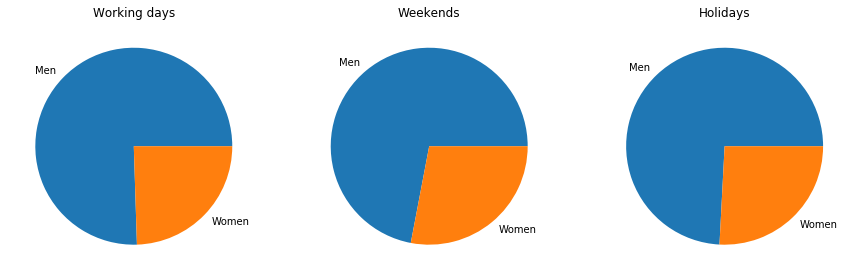

In [4]:
men_women_proportion = []

def plot_genders(dataset, title):
    counts = dataset[dataset['gender'] > 0].groupby('gender', as_index=False).agg({'tripduration': 'count'})
    plt.title(title)
    plt.pie('tripduration', data=counts, labels=['Men', 'Women'])
    men_women_proportion.append(counts.loc[0].tripduration / counts.loc[1].tripduration)
    
plt.figure(figsize=(15, 7))
plt.subplot(1, 3, 1)
plot_genders(working_days, 'Working days')
plt.subplot(1, 3, 2)
plot_genders(weekend_days, 'Weekends')
plt.subplot(1, 3, 3)
plot_genders(holiday_days, 'Holidays')
plt.show()

# User type

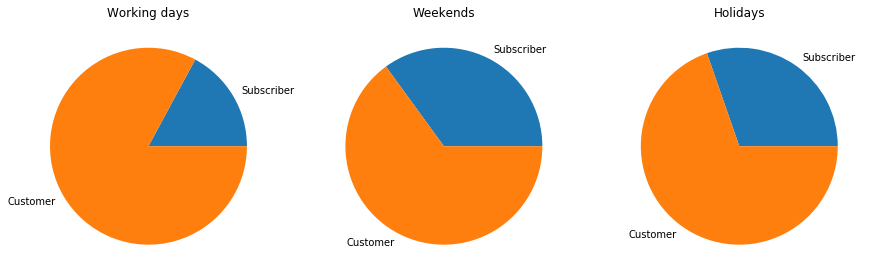

In [5]:
subscriber_customer_proportion = []

def plot_usertypes(dataset, title):
    counts = dataset.groupby('usertype', as_index=False).agg({'tripduration': 'count'})
    plt.title(title)
    plt.pie('tripduration', data=counts, labels=['Subscriber', 'Customer'])
    subscriber_customer_proportion.append(counts.loc[1].tripduration / counts.loc[0].tripduration)
    
plt.figure(figsize=(15, 7))
plt.subplot(1, 3, 1)
plot_usertypes(working_days, 'Working days')
plt.subplot(1, 3, 2)
plot_usertypes(weekend_days, 'Weekends')
plt.subplot(1, 3, 3)
plot_usertypes(holiday_days, 'Holidays')
plt.show()

# Duration

In [6]:
working_durations = working_days[working_days.tripduration < 3e3].tripduration / 60
weekend_durations = weekend_days[weekend_days.tripduration < 3e3].tripduration / 60
holiday_durations = holiday_days[holiday_days.tripduration < 3e3].tripduration / 60

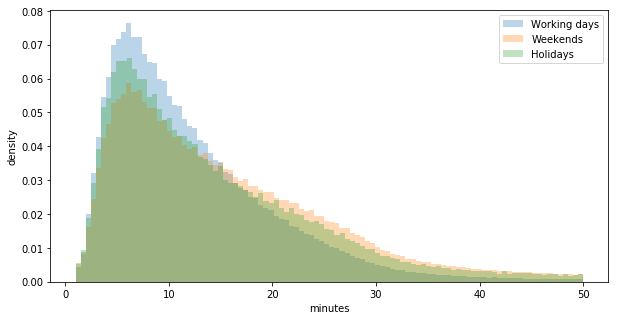

In [7]:
plt.figure(figsize=(15, 10))
plt.hist(working_durations, bins=100, density=True, alpha=0.3, label='Working days')
plt.hist(weekend_durations, bins=100, density=True, alpha=0.3, label='Weekends')
plt.hist(holiday_durations, bins=100, density=True, alpha=0.3, label='Holidays')
plt.legend()
plt.xlabel('minutes')
plt.ylabel('density')
plt.show()

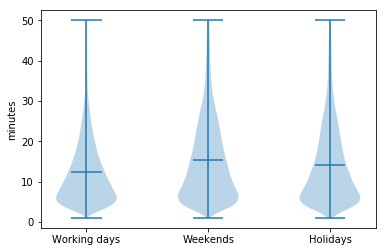

In [8]:
plt.figure(figsize=(15, 10))
plt.violinplot(
    [working_durations.values, weekend_durations.values, holiday_durations.values],
    [0, 1, 2],
    showmeans=True,
    showmedians=False
)
plt.xticks(ticks=[0, 1, 2], labels=['Working days', 'Weekends', 'Holidays'])
plt.ylabel('minutes')
plt.show()

# Distance

In [9]:
def get_distances(dataset):
    dataset = dataset.merge(distances, left_on=['start station id', 'end station id'], right_on=['id_x', 'id_y'])
    return dataset[(dataset.distance > 0) & (dataset.distance < 10)].distance

working_distances = get_distances(working_days)
weekend_distances = get_distances(weekend_days)
holiday_distances = get_distances(holiday_days)

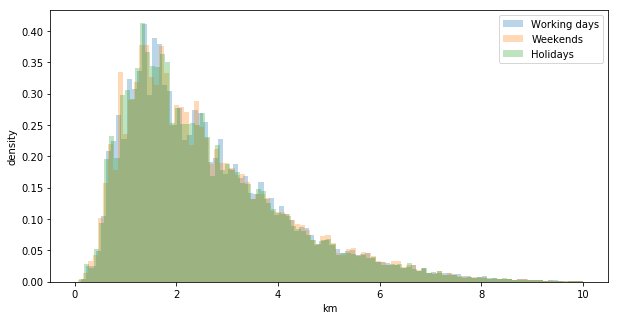

In [10]:
plt.figure(figsize=(15, 10))
plt.hist(working_distances, bins=100, density=True, alpha=0.3, label='Working days')
plt.hist(weekend_distances, bins=100, density=True, alpha=0.3, label='Weekends')
plt.hist(holiday_distances, bins=100, density=True, alpha=0.3, label='Holidays')
plt.legend()
plt.xlabel('km')
plt.ylabel('density')
plt.show()

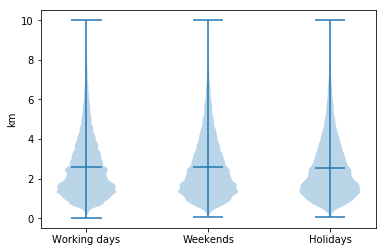

In [11]:
plt.figure(figsize=(15, 10))
plt.violinplot(
    [working_distances.values, weekend_distances.values, holiday_distances.values],
    [0, 1, 2],
    showmeans=True,
    showmedians=False
)
plt.xticks(ticks=[0, 1, 2], labels=['Working days', 'Weekends', 'Holidays'])
plt.ylabel('km')
plt.show()

# Speed

In [12]:
working_speeds = (working_distances / (working_durations / 60)).dropna()
working_speeds = working_speeds[working_speeds < 60]

weekend_speeds = (weekend_distances / (weekend_durations / 60)).dropna()
weekend_speeds = weekend_speeds[weekend_speeds < 60]

holiday_speeds = (holiday_distances / (holiday_durations / 60)).dropna()
holiday_speeds = holiday_speeds[holiday_speeds < 60]

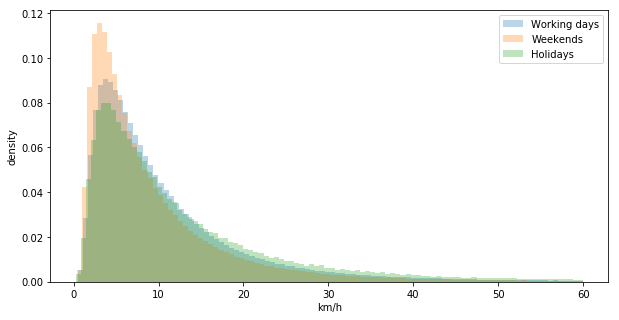

In [13]:
plt.figure(figsize=(15, 10))
plt.figure(figsize=(10, 5))
plt.hist(working_speeds, bins=100, density=True, alpha=0.3, label='Working days')
plt.hist(weekend_speeds, bins=100, density=True, alpha=0.3, label='Weekends')
plt.hist(holiday_speeds, bins=100, density=True, alpha=0.3, label='Holidays')
plt.xlabel('km/h')
plt.ylabel('density')
plt.legend()
plt.show()

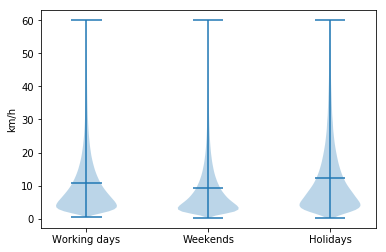

In [14]:
plt.figure(figsize=(15, 10))
plt.violinplot(
    [working_speeds.values, weekend_speeds.values, holiday_speeds.values],
    [0, 1, 2],
    showmeans=True,
    showmedians=False
)
plt.xticks(ticks=[0, 1, 2], labels=['Working days', 'Weekends', 'Holidays'])
plt.ylabel('km/h')
plt.show()

# Age

In [15]:
def get_ages(dataset):
    tage = dataset["birth year"]
    tage = tage[tage != '\\N'].astype(float)
    tage = tage[(tage != 1969) & (tage > 1934)]
    tage = 2018 - tage
    return tage

working_ages = get_ages(working_days)
weekend_ages = get_ages(weekend_days)
holiday_ages = get_ages(holiday_days)

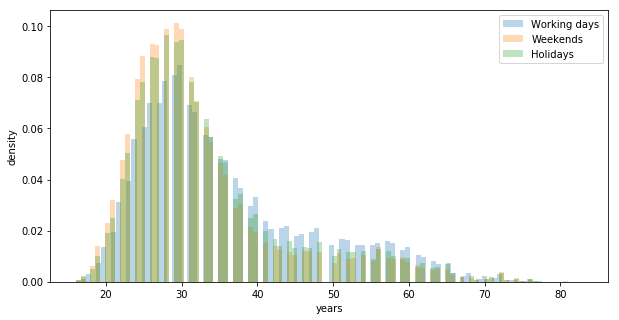

In [16]:
plt.figure(figsize=(15, 10))
plt.hist(working_ages, bins=100, density=True, alpha=0.3, label='Working days')
plt.hist(weekend_ages, bins=100, density=True, alpha=0.3, label='Weekends')
plt.hist(holiday_ages, bins=100, density=True, alpha=0.3, label='Holidays')
plt.legend()
plt.xlabel('years')
plt.ylabel('density')
plt.show()

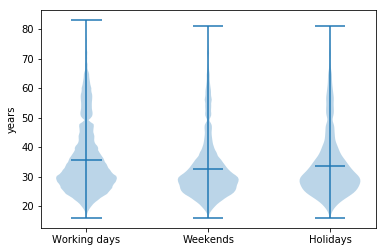

In [17]:
plt.figure(figsize=(15, 10))
plt.violinplot(
    [working_ages.values, weekend_ages.values, holiday_ages.values],
    [0, 1, 2],
    showmeans=True,
    showmedians=False
)
plt.xticks(ticks=[0, 1, 2], labels=['Working days', 'Weekends', 'Holidays'])
plt.ylabel('years')
plt.show()

# Daily usage

In [18]:
def get_daily_usage(dataset):
    agg = dataset.groupby('per_day', as_index=False).agg({'tripduration': 'count'})
    agg.columns = ['day', 'counts']
    agg.day = agg.day.dt.to_timestamp()
    return agg
    
working_daily_usage = get_daily_usage(working_days)
weekend_daily_usage = get_daily_usage(weekend_days)
holiday_daily_usage = get_daily_usage(holiday_days)

In [19]:
working_dates = [pd.to_datetime(d) for d in working_daily_usage.day]
weekend_dates = [pd.to_datetime(d) for d in weekend_daily_usage.day]
holiday_dates = [pd.to_datetime(d) for d in holiday_daily_usage.day]

/usr/local/lib/python3.5/dist-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


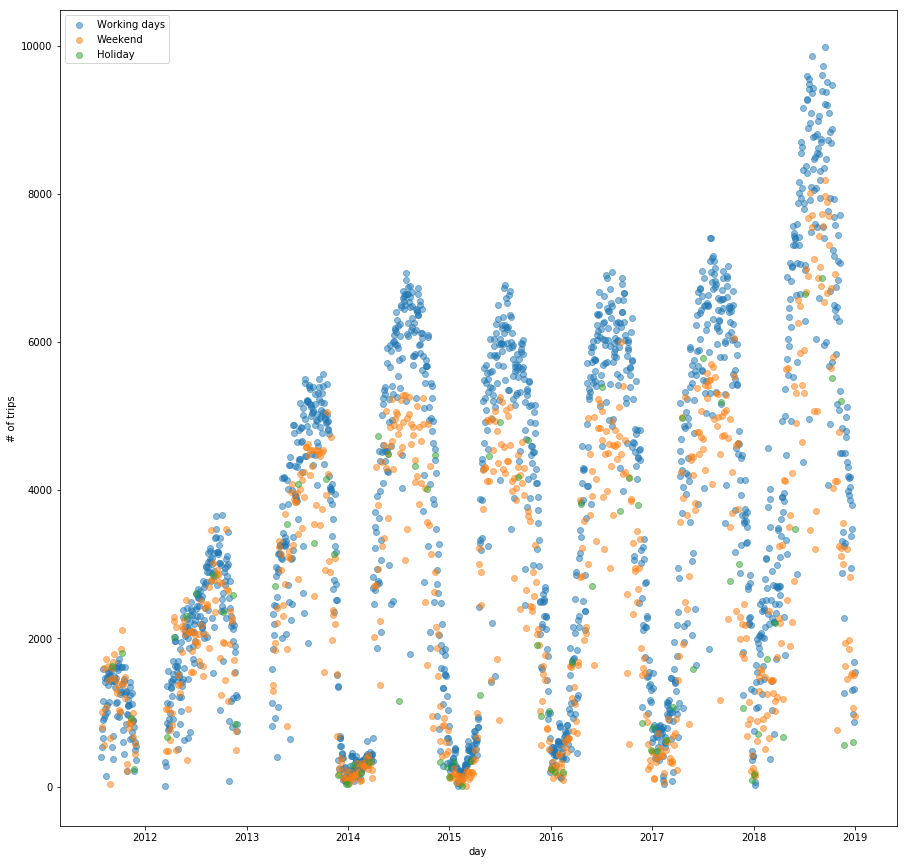

In [20]:
plt.figure(figsize=(15, 15))
plt.scatter(working_dates, working_daily_usage.counts, alpha=0.5, label='Working days')
plt.scatter(weekend_dates, weekend_daily_usage.counts, alpha=0.5, label='Weekend')
plt.scatter(holiday_dates, holiday_daily_usage.counts, alpha=0.5, label='Holiday')
plt.legend()
plt.xlabel('day')
plt.ylabel('# of trips')
plt.show()

# Summary

In [21]:
pd.DataFrame(OrderedDict([
    ('class', ['Working days', 'Weekends', 'Holidays']),
    ('men/woman', men_women_proportion),
    ('subscriber/customer', subscriber_customer_proportion),
    ('mean duration (minutes)', [working_durations.mean(), weekend_durations.mean(), holiday_durations.mean()]),
    ('duration std. dev.', [working_durations.std(), weekend_durations.std(), holiday_durations.std()]),
    ('mean distance (km)', [working_distances.mean(), weekend_distances.mean(), holiday_distances.mean()]),
    ('distance std. dev.', [working_distances.std(), weekend_distances.std(), holiday_distances.std()]),
    ('mean speed (km/h)', [working_speeds.mean(), weekend_speeds.mean(), holiday_speeds.mean()]),
    ('speed std. dev.', [working_speeds.std(), weekend_speeds.std(), holiday_speeds.std()]),
    ('mean age (years)', [working_ages.mean(), weekend_ages.mean(), holiday_ages.mean()]),
    ('age std. dev.', [working_ages.std(), weekend_ages.std(), holiday_ages.std()]),
    ('mean daily usage (#trips)', [working_daily_usage.counts.mean(), weekend_daily_usage.counts.mean(), 
                                   holiday_daily_usage.counts.mean()]),
    ('daily usage std. dev.', [working_daily_usage.counts.std(), weekend_daily_usage.counts.std(), 
                               holiday_daily_usage.counts.std()]),
]))

class  men/woman  subscriber/customer  mean duration (minutes)  \
0  Working days     3.0833               4.8394                  12.2931   
1      Weekends     2.5719               1.8565                  15.2411   
2      Holidays     2.8716               2.2967                  14.2299   

   duration std. dev.  mean distance (km)  distance std. dev.  \
0              7.9893              2.6125              1.5860   
1              9.9428              2.6089              1.5880   
2              9.6719              2.5604              1.5603   

   mean speed (km/h)  speed std. dev.  mean age (years)  age std. dev.  \
0            10.7456           9.1857           35.7729        11.4478   
1             9.2741           8.5871           32.6658        10.3938   
2            12.3879          10.7738           33.6759        10.6940   

   mean daily usage (#trips)  daily usage std. dev.  
0                  3606.3828              2384.2611  
1                  2711.5297              1918.2532  
2                  2247.3375              1894.9069